In [1]:
# Importing necessary libraries
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

In [2]:
# Defining the Double DQN Agent
class TaxiAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros([state_size, action_size])
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.1

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(self.q_table[state])

    def train(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = reward + self.gamma * np.amax(self.q_table[next_state])
        self.q_table[state, action] += self.learning_rate * (target - self.q_table[state, action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.q_table, f)

    def load(self, filename):
        with open(filename, 'rb') as f:
            self.q_table = pickle.load(f)

In [3]:
# Create the Taxi environment
env = gym.make("Taxi-v3")

# Initialize the agent
state_size = env.observation_space.n
action_size = env.action_space.n
agent = TaxiAgent(state_size, action_size)

In [ ]:
# Training parameters
n_episodes = 50000
max_steps = 100

# Lists to store results
scores = []
steps_list = []
epsilons = []

# Training loop
for e in range(n_episodes):
    state, _ = env.reset()
    score = 0
    
    for step in range(max_steps):
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        
        # Modify reward to encourage fewer actions
        reward -= 0.1  
        
        agent.train(state, action, reward, next_state, done)
        
        state = next_state
        score += reward
        
        if done:
            break
    
    scores.append(score)
    steps_list.append(step + 1)
    epsilons.append(agent.epsilon)
    
    if e % 1000 == 0:
        print(f"Episode: {e}/{n_episodes}, Score: {score:.2f}, Steps: {step+1}, Epsilon: {agent.epsilon:.2f}")

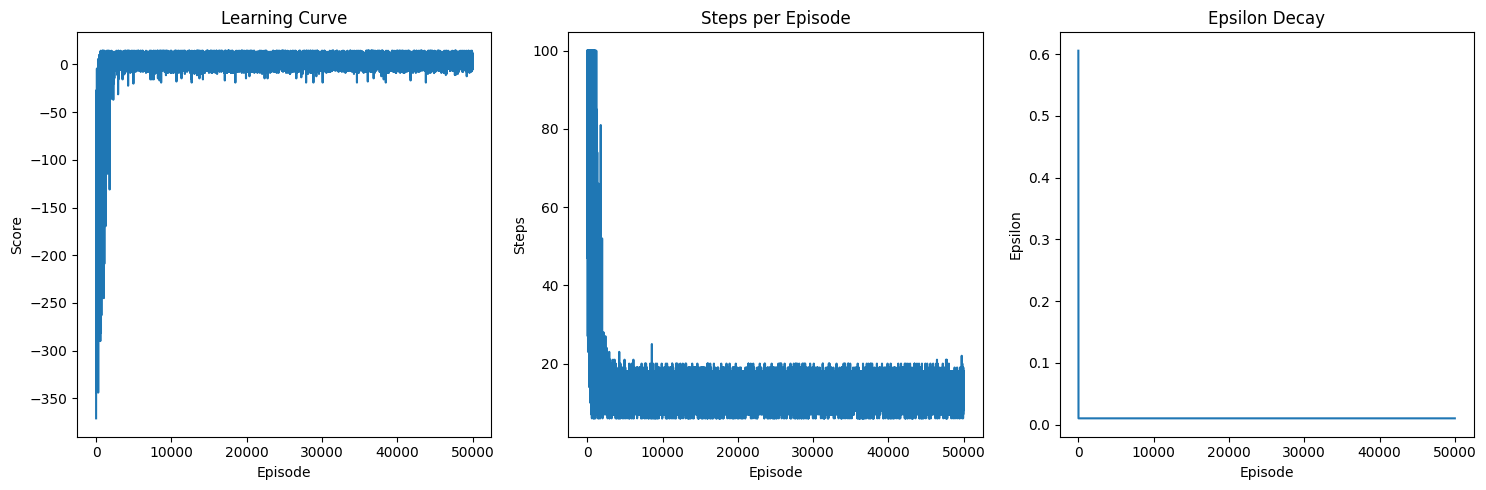

Training completed.


In [5]:
# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Learning Curve')
plt.xlabel('Episode')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(steps_list)
plt.title('Steps per Episode')
plt.xlabel('Episode')
plt.ylabel('Steps')

plt.subplot(1, 3, 3)
plt.plot(epsilons)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon')

plt.tight_layout()
plt.show()

print("Training completed.")

In [6]:
# Save the trained model
model_filename = "taxi_agent_model.pkl"
agent.save(model_filename)
print(f"Model saved as {model_filename}")

# Evaluate the trained agent
n_eval_episodes = 100
total_steps = 0
total_rewards = 0

for _ in range(n_eval_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0
    
    for step in range(max_steps):
        action = np.argmax(agent.q_table[state])
        state, reward, done, _, _ = env.step(action)
        episode_reward += reward
        if done:
            break
    
    total_steps += step + 1
    total_rewards += episode_reward

avg_steps = total_steps / n_eval_episodes
avg_reward = total_rewards / n_eval_episodes

print(f"\nEvaluation over {n_eval_episodes} episodes:")
print(f"Average steps per episode: {avg_steps:.2f}")
print(f"Average reward per episode: {avg_reward:.2f}")

Model saved as taxi_agent_model.pkl

Evaluation over 100 episodes:
Average steps per episode: 12.79
Average reward per episode: 8.21
